Connect with google drive, and copy the sample data.

In [15]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r drive/MyDrive/data/project_jl/. .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install and update libraries.

In [12]:
import pandas as pd
import numpy as np
import warnings, csv
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [17]:
symbols = ["BTCUSDT","SOLUSDT","PNUTUSDT","TURBOUSDT","APTUSDT","AIXBTUSDT","TAOUSDT","KAITOUSDT","OMUSDT","XRPUSDT","FETUSDT","UNIUSDT","COMPUSDT","THEUSDT","AVAXUSDT","LTCUSDT","ETCUSDT","FORMUSDT","TONUSDT","HFTUSDT","DOTUSDT","CHESSUSDT","MKRUSDT","WIFUSDT"]
selected_symbols = ["BTCUSDT","SOLUSDT","PNUTUSDT","TURBOUSDT","APTUSDT","AIXBTUSDT","TAOUSDT","KAITOUSDT","OMUSDT"]
basis_name = 'basis_5_2025-05-22.csv'
df_basis = pd.read_csv(basis_name)

# display(df_basis.info())
print(df_basis.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86377 entries, 0 to 86376
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   local_timestamp   86377 non-null  object 
 1   BTCUSDT.basis1    86374 non-null  float64
 2   BTCUSDT.basis2    86373 non-null  float64
 3   SOLUSDT.basis1    86283 non-null  float64
 4   SOLUSDT.basis2    86282 non-null  float64
 5   PNUTUSDT.basis1   85885 non-null  float64
 6   PNUTUSDT.basis2   85884 non-null  float64
 7   TURBOUSDT.basis1  83273 non-null  float64
 8   TURBOUSDT.basis2  83272 non-null  float64
 9   APTUSDT.basis1    84680 non-null  float64
 10  APTUSDT.basis2    84679 non-null  float64
 11  AIXBTUSDT.basis1  79384 non-null  float64
 12  AIXBTUSDT.basis2  79383 non-null  float64
 13  TAOUSDT.basis1    86281 non-null  float64
 14  TAOUSDT.basis2    86280 non-null  float64
 15  KAITOUSDT.basis1  86320 non-null  float64
 16  KAITOUSDT.basis2  86319 non-null  float6

None

       local_timestamp  BTCUSDT.basis1  BTCUSDT.basis2  SOLUSDT.basis1  \
0  2025-05-22 00:00:01             NaN             NaN             NaN   
1  2025-05-22 00:00:02       -0.000551       -0.000550       -0.000749   
2  2025-05-22 00:00:03       -0.000551       -0.000550       -0.000691   
3  2025-05-22 00:00:04       -0.000551       -0.000550       -0.000691   
4  2025-05-22 00:00:05       -0.000327       -0.000301       -0.000576   

   SOLUSDT.basis2  PNUTUSDT.basis1  PNUTUSDT.basis2  TURBOUSDT.basis1  \
0             NaN              NaN              NaN               NaN   
1       -0.000634              NaN              NaN               NaN   
2       -0.000576        -0.000961        -0.000565               NaN   
3       -0.000576        -0.000961        -0.000565         -0.001548   
4       -0.000288        -0.000932        -0.000226         -0.001439   

   TURBOUSDT.basis2  APTUSDT.basis1  ...  HFTUSDT.basis1  HFTUSDT.basis2  \
0               NaN             NaN  ...

Coin:  BTCUSDT
Coin:  SOLUSDT
Coin:  PNUTUSDT
Coin:  TURBOUSDT
Coin:  APTUSDT
Coin:  AIXBTUSDT
Coin:  TAOUSDT
Coin:  KAITOUSDT
Coin:  OMUSDT


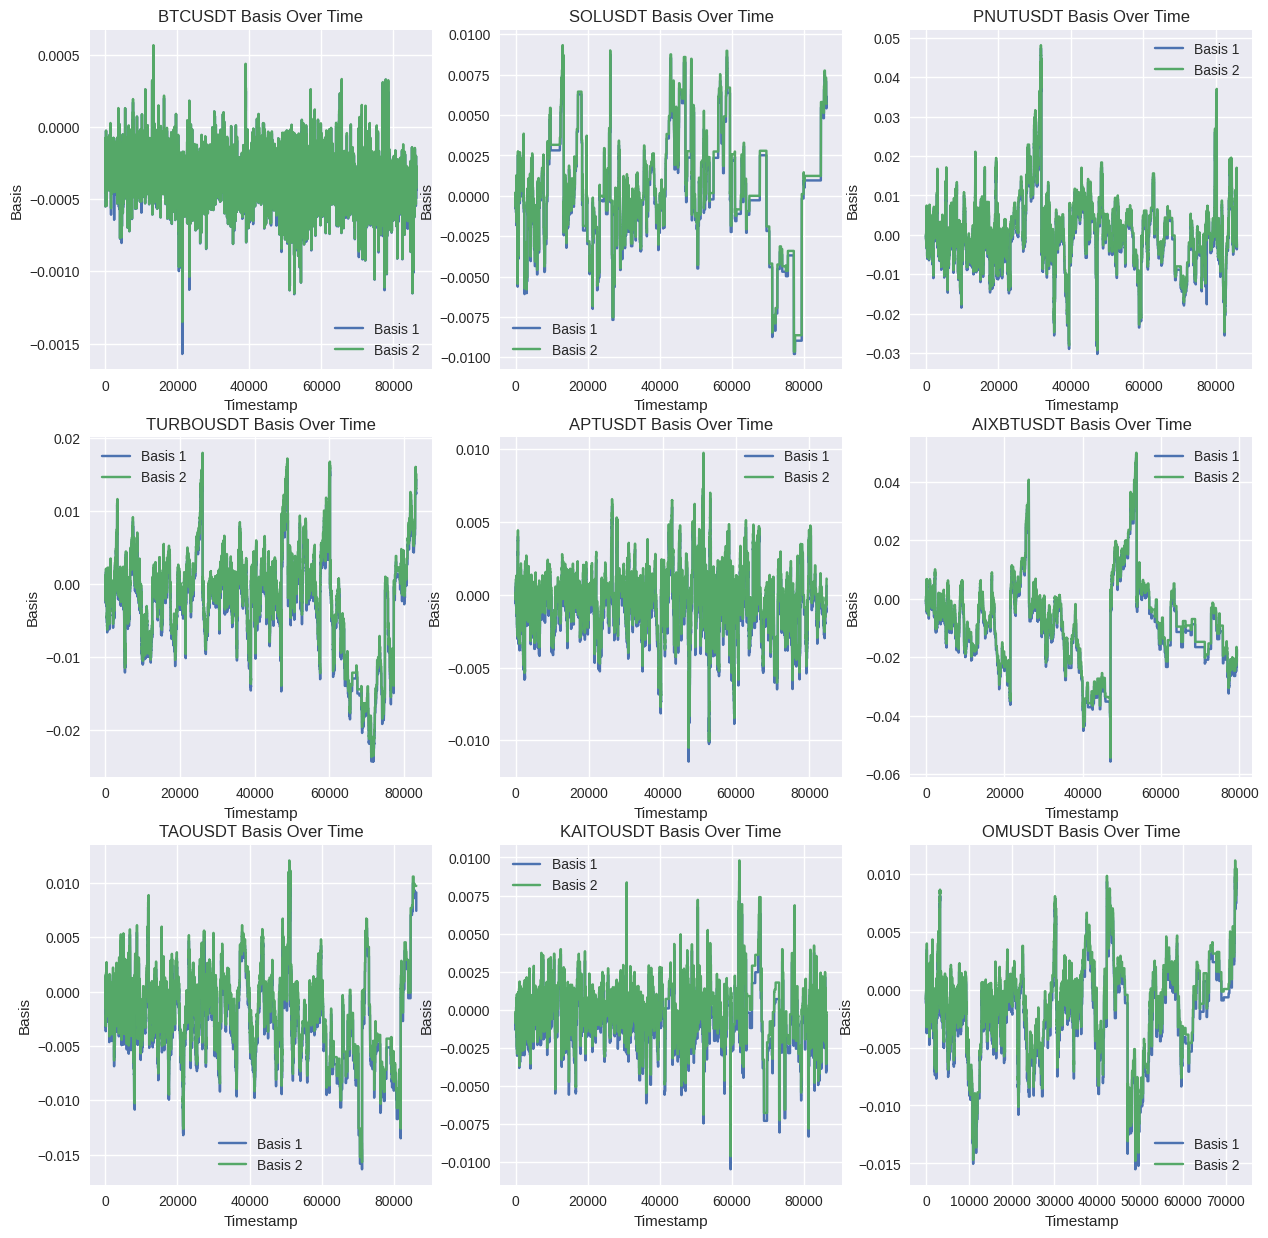

In [22]:
num_symbols = len(selected_symbols)
num_cols = 3  # Adjust the number of columns as needed
num_rows = (num_symbols + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, symbol in enumerate(selected_symbols):
    print('Coin: ', symbol)
    ax = axes[i]
    basis1_col = f'{symbol}.basis1'
    basis2_col = f'{symbol}.basis2'

    if basis1_col in df_basis.columns:
        ax.plot(df_basis.index, df_basis[basis1_col], label='Basis 1')
    if basis2_col in df_basis.columns:
        ax.plot(df_basis.index, df_basis[basis2_col], label='Basis 2')

    ax.set_title(f'{symbol} Basis Over Time')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Basis')
    ax.legend()
    ax.grid(True)
    # ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# plt.tight_layout()
plt.show()

In [23]:
display(df_basis.describe())

,BTCUSDT.basis1,BTCUSDT.basis2,SOLUSDT.basis1,SOLUSDT.basis2,PNUTUSDT.basis1,PNUTUSDT.basis2,TURBOUSDT.basis1,TURBOUSDT.basis2,APTUSDT.basis1,APTUSDT.basis2,...,HFTUSDT.basis1,HFTUSDT.basis2,DOTUSDT.basis1,DOTUSDT.basis2,CHESSUSDT.basis1,CHESSUSDT.basis2,MKRUSDT.basis1,MKRUSDT.basis2,WIFUSDT.basis1,WIFUSDT.basis2
count,86374.000000,86373.000000,86283.000000,86282.000000,85885.000000,85884.000000,83273.000000,83272.000000,84680.000000,84679.000000,...,82418.000000,82417.000000,79938.000000,79937.000000,49118.000000,49117.000000,82505.000000,82504.000000,53524.000000,53523.000000
mean,-0.000363,-0.000358,0.000078,0.000358,0.000066,0.000892,-0.002640,-0.001908,-0.000688,-0.000244,...,-0.004642,-0.001739,-0.000667,0.000184,-0.003495,-0.000145,-0.001898,-0.000401,-0.018855,-0.017461
std,0.000130,0.000130,0.003530,0.003544,0.008728,0.008732,0.007083,0.007090,0.002074,0.002080,...,0.006481,0.006629,0.002118,0.002083,0.005113,0.005078,0.005413,0.005456,0.020135,0.020360
min,-0.001572,-0.001351,-0.009800,-0.009655,-0.030280,-0.029316,-0.024355,-0.023732,-0.011463,-0.010516,...,-0.024571,-0.022362,-0.006587,-0.005776,-0.017771,-0.014288,-0.020316,-0.018808,-0.062345,-0.061044
25%,-0.000438,-0.000433,-0.001970,-0.001681,-0.004578,-0.003553,-0.006016,-0.005273,-0.001686,-0.001267,...,-0.007864,-0.004922,-0.001649,-0.000618,-0.007099,-0.003483,-0.004252,-0.002874,-0.033116,-0.031574
50%,-0.000361,-0.000357,-0.000173,0.000115,-0.000469,0.000375,-0.001143,-0.000505,-0.000597,-0.000184,...,-0.003090,-0.000245,-0.000633,0.000000,-0.003139,0.000139,-0.001377,0.000113,-0.018593,-0.017208
75%,-0.000285,-0.000281,0.002311,0.002593,0.004136,0.004896,0.001315,0.001983,0.000299,0.000756,...,-0.000926,0.001971,0.000205,0.001019,0.000140,0.003605,0.001221,0.002775,-0.003339,-0.002124
max,0.000512,0.000566,0.008988,0.009332,0.047407,0.048178,0.017413,0.017970,0.009237,0.009752,...,0.015908,0.018934,0.010335,0.010956,0.010062,0.013153,0.008792,0.010394,0.025274,0.027213
